# Principal Component Analysis (PCA) 

Principal Component Analysis (PCA), is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

We use all the features in the penguin dataset and do the PCA first.

## 1. Data preprocessing

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("palmer_penguins.csv")

df.dropna(inplace = True)
df.drop("Unnamed: 0", axis = 1, inplace = True)
df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


We first initialize the feature X matrix and the label y

In [8]:
X = df[["bill_length_mm", "bill_depth_mm","flipper_length_mm","body_mass_g"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Adelie":
        return 0
    
    elif y == "Chinstrap":
        return 1
    else:
        return 2
         
# Create target value array
y = df["species"].map(make_labels).to_numpy()


## 2. PCA

Use PCA to take advantage of all features. We want to only have two dimensions, so the n_components is set to 2.

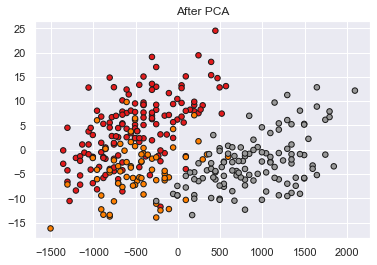

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

newX = pca.transform(X)

plt.scatter(
    newX[:,0],
    newX[:,1],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor='k',
    s=30,
)
plt.title("After PCA")
plt.show()

we can see how much variance ratio these two principal components can explain.

In [15]:
print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [9.99893229e-01 7.82232504e-05]
per_var = [9.999e+01 1.000e-02] 



we also can see the variance ratio through plot.

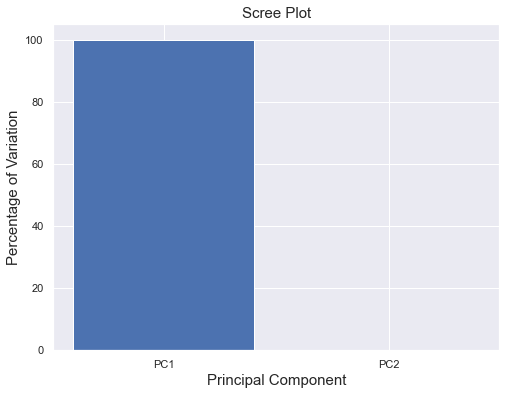

In [18]:
labels = [f"PC{i}" for i in range(1,3)]

plt.figure(figsize = (8, 6))
plt.bar(x = range(1, 3), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

we can see that the PC1 almost can explain all the variance, so we can just use the PC1.

In [25]:
features = ["bill_length_mm", "bill_depth_mm","flipper_length_mm","body_mass_g"]
#features
pca.components_
pd.DataFrame(data = pca.components_, index = labels, columns = features)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
PC1,0.004003,-0.001154,0.015195,0.999876
PC2,-0.319278,0.086848,-0.943542,0.015717


we can see that the ratio of 'body_mass_g' is very high compared with other three features. It may be the magnitude of the body_mass_g is different. we should scale X and do the PCA again based on the scaled X. This time, we do not set the number of principal components.

In [26]:
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.68633893 0.19452929 0.09216063 0.02697115]
per_var = [68.63 19.45  9.22  2.7 ] 



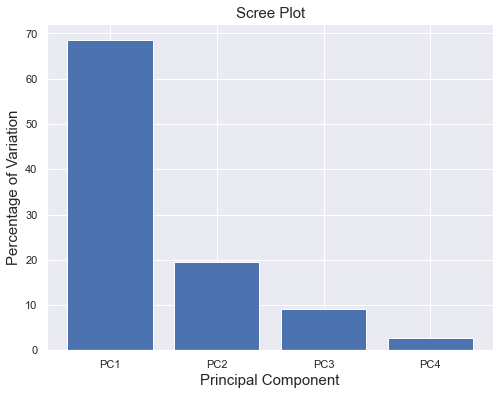

In [27]:
labels = [f"PC{i}" for i in range(1,5)]

plt.figure(figsize = (8, 6))
plt.bar(x = range(1, 5), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

we can see that the new PCA based on scaled X has 4 components. And the total variance of PC1 plus PC2 is almost 90%. Next, we look at the ratio of four features in the PC1 and PC2 respectively.

In [28]:
pca.components_
pd.DataFrame(data = pca.components_, index = labels, columns = features)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
PC1,0.453753,-0.399047,0.576825,0.549675
PC2,0.600195,0.796170,0.005788,0.076464
PC3,0.642495,-0.425800,-0.236095,-0.591737
PC4,0.145170,-0.159904,-0.781984,0.584686


The contribution of these four features in PC1 and PC2 looks better than that of the first PCA. Next, we use the PC1 and PC2 to 
get the transformed feature matrix X

 we use pca.transform to see how our data looks like in the new coordinate system,this will be used later to plot our data in the first two coordinates PC1, PC2

In [31]:
pca_data = pca.transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns = labels)

pca_df

,PC1,PC2,PC3,PC4
0,-1.853593,0.032069,-0.234902,0.528397
1,-1.316254,-0.443527,-0.027470,0.401727
2,-1.376605,-0.161230,0.189689,-0.528662
3,-1.885288,-0.012351,-0.628873,-0.472893
4,-1.919981,0.817598,-0.701051,-0.196416
...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892
329,1.832651,-0.784510,0.240758,-0.008955
330,2.751505,0.266556,-0.419306,0.236256
331,1.713854,-0.725875,-0.262764,0.330004


we add to the previous table the labels for each penguin


In [42]:
pca_df["species"] = df.species.to_numpy()
pca_df

,PC1,PC2,PC3,PC4,species
0,-1.853593,0.032069,-0.234902,0.528397,Adelie
1,-1.316254,-0.443527,-0.027470,0.401727,Adelie
2,-1.376605,-0.161230,0.189689,-0.528662,Adelie
3,-1.885288,-0.012351,-0.628873,-0.472893,Adelie
4,-1.919981,0.817598,-0.701051,-0.196416,Adelie
...,...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892,Gentoo
329,1.832651,-0.784510,0.240758,-0.008955,Gentoo
330,2.751505,0.266556,-0.419306,0.236256,Gentoo
331,1.713854,-0.725875,-0.262764,0.330004,Gentoo


In [44]:
def colors(y):
    if y == 0:
        return "red"
    elif y == 1:
        return "magenta"
    else:
        return "lightseagreen"

c = [colors(label) for label in y]

In [49]:
pca_df["color"] = c
pca_df

,PC1,PC2,PC3,PC4,species,color
0,-1.853593,0.032069,-0.234902,0.528397,Adelie,red
1,-1.316254,-0.443527,-0.027470,0.401727,Adelie,red
2,-1.376605,-0.161230,0.189689,-0.528662,Adelie,red
3,-1.885288,-0.012351,-0.628873,-0.472893,Adelie,red
4,-1.919981,0.817598,-0.701051,-0.196416,Adelie,red
...,...,...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892,Gentoo,lightseagreen
329,1.832651,-0.784510,0.240758,-0.008955,Gentoo,lightseagreen
330,2.751505,0.266556,-0.419306,0.236256,Gentoo,lightseagreen
331,1.713854,-0.725875,-0.262764,0.330004,Gentoo,lightseagreen


We next plot the three species on the new coordinates PC1, PC2.

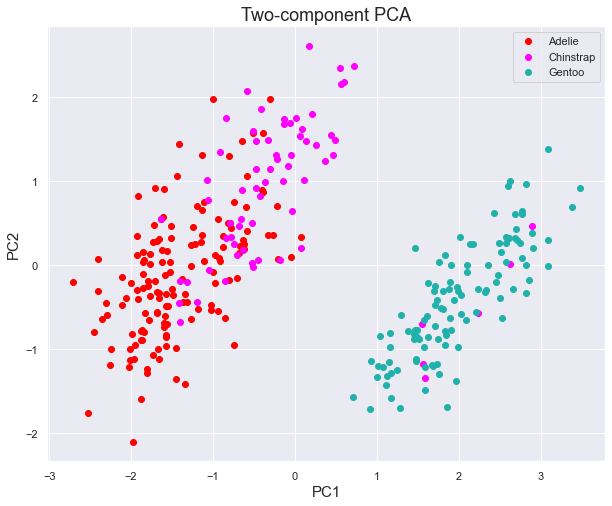

In [51]:
targets = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df['species'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()

From the plot, we can see that after considering the four features, on the new coordinates PC1,PC2, the Adelie and Chinstrap
,these two species are mixed. The results of clustering may not be very good. But, we still should try it.

## 3. K-Means Clustering

In [57]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter= 100, random_state=0)



In [58]:
X = pca_df[["PC1","PC2","PC3","PC4"]].to_numpy()


In [59]:
kmeans.fit(X)

KMeans(max_iter=100, n_clusters=3, random_state=0)

In [67]:
sklabels = kmeans.labels_
sklabels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [69]:
def colors(y):
    if y == 0:
        return "red"
    elif y == 2:
        return "magenta"
    else:
        return "lightseagreen"


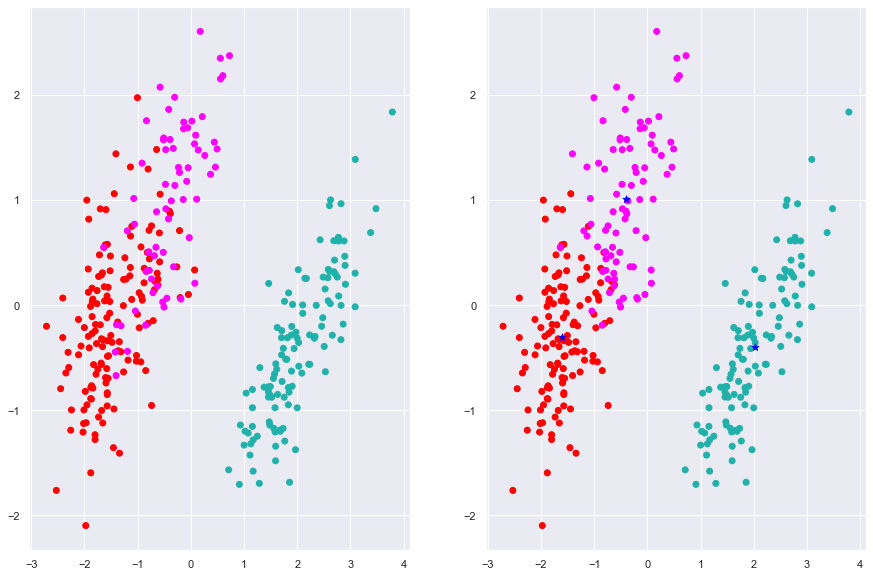

In [70]:
current_colors = [colors(label) for label in sklabels]
centers = kmeans.cluster_centers_

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)

ax2.scatter([centers[0,0]],[centers[0,1]], color = "blue", marker = '*', s =50)
ax2.scatter([centers[1,0]],[centers[1,1]], color = "blue", marker = '*', s =50)
ax2.scatter([centers[2,0]],[centers[2,1]], color = "blue", marker = '*', s =50)
plt.show()

From the plots above, we can see that even the mixed plots, the result of kmeans clustering is good, which means the more features and PCA work. 